In [1]:
import pandas as pd

X = pd.read_csv('serotonin_clean_needed_dataset.csv')

,molecule_chembl_id,canonical_smiles,standard_value
166,CHEMBL269538,COc1ccc2c(c1)[nH]c1c(C)nccc12,10000.0
2069,CHEMBL2030635,c1ccc(CCN2CCCC2)cc1,10000.0
49,CHEMBL417035,Fc1ccc(CCNCC2CCCN(CCOC(c3ccccc3)c3ccccc3)C2)cc1,890.0
2376,CHEMBL3656914,O=c1ccoc2ccc(CCN3CCC(Cc4ccc(Br)c(O)c4)CC3)cc12,1.7
961,CHEMBL273208,CNCc1cnc(C)cc1Oc1ccccc1Oc1ccccc1,823.0
...,...,...,...
1638,CHEMBL1080790,CC(C)(C)CN(C(=O)c1cccc(Cl)c1Cl)[C@H]1CCNC1,4.0
1095,CHEMBL495464,Cc1ccc([C@H]2C[C@@H]3CC[C@H]([C@H]2C=C(Br)Br)N...,39.0
1130,CHEMBL520869,c1ccc(CC2(c3ccc4[nH]ncc4c3)CCNC2)cc1,1.0
1294,CHEMBL512736,COc1ccc(F)cc1[C@H]1CC[C@H](CCN)O1,1808.0


### Diversity of Chemical Space

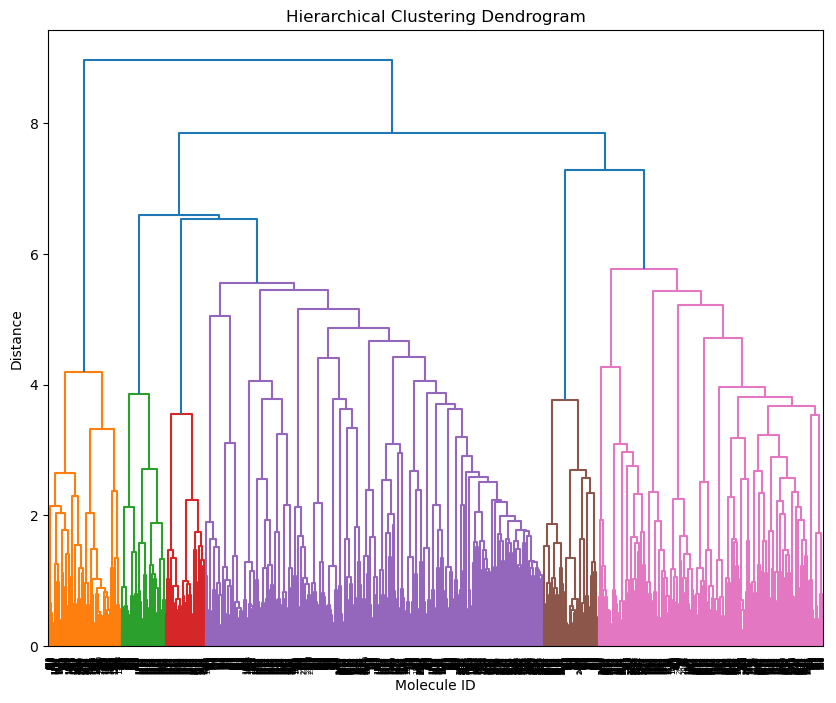

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import DataStructs
from scipy.cluster import hierarchy

# Load the dataset of molecules
# mols = [mol for mol in Chem.SDMolSupplier('dataset.sdf')]

# Convert the SMILES strings to RDKit molecules
mols = [Chem.MolFromSmiles(smiles) for smiles in X["canonical_smiles"]]

# Generate molecular fingerprints for each molecule
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

# Calculate the pairwise Tanimoto similarity index between all pairs of molecules
similarity_matrix = np.zeros((len(mols), len(mols)))
for i in range(len(mols)):
    for j in range(i+1, len(mols)):
        similarity_matrix[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[j,i] = similarity_matrix[i,j]

# Convert the similarity matrix to a distance matrix for hierarchical clustering
distance_matrix = 1 - squareform(similarity_matrix)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='ward').fit(distance_matrix[0:10].reshape(-1,1))

# Visualize the clustering using a dendrogram
fig, ax = plt.subplots(figsize=(10, 8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(distance_matrix, method='ward'), ax=ax)
plt.xlabel('Molecule ID')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [1]:
# similarity_matrix = np.zeros((len(mols), len(mols)))
# similarity_matrix
# [[distance_matrix[0:100].reshape(-1,1)]]

<AxesSubplot:>

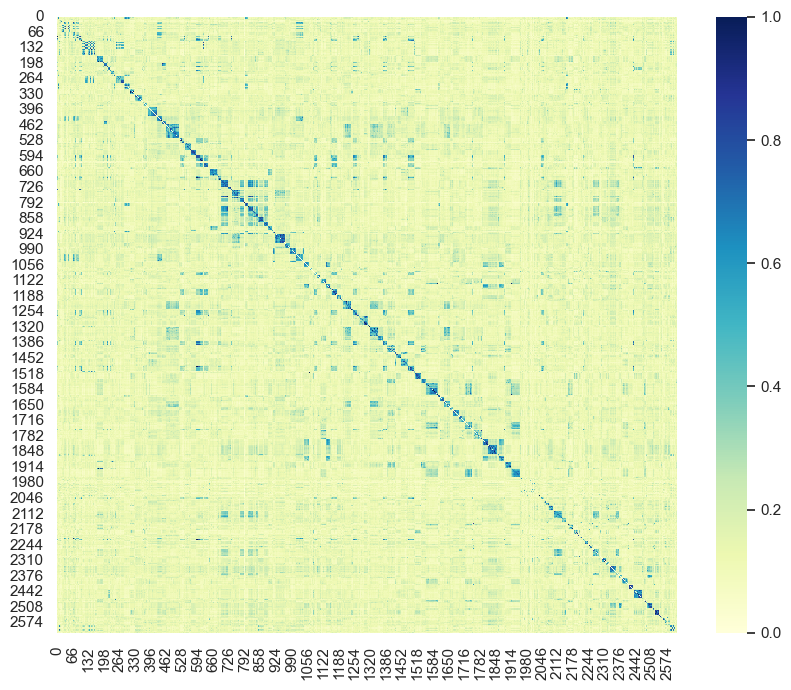

In [32]:
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import DataStructs
from scipy.cluster import hierarchy

# Load the dataset of molecules
# mols = [mol for mol in Chem.SDMolSupplier('dataset.sdf')]

# Convert the SMILES strings to RDKit molecules
mols = [Chem.MolFromSmiles(smiles) for smiles in X["canonical_smiles"]]

# Generate molecular fingerprints for each molecule
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

# Calculate the pairwise Tanimoto similarity index between all pairs of molecules
similarity_matrix = np.zeros((len(mols), len(mols)))
for i in range(len(mols)):
    for j in range(i+1, len(mols)):
        similarity_matrix[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[j,i] = similarity_matrix[i,j]
# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=range(len(mols)), columns=range(len(mols)))

# Plot the heatmap
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(similarity_df, cmap="YlGnBu")
# plt.savefig('result3/graph/heatmap.png', dpi=300)

C:\Users\USER\AppData\Local\Temp\ipykernel_12252\3211066760.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(similarity_matrix, method='ward')


<AxesSubplot:>

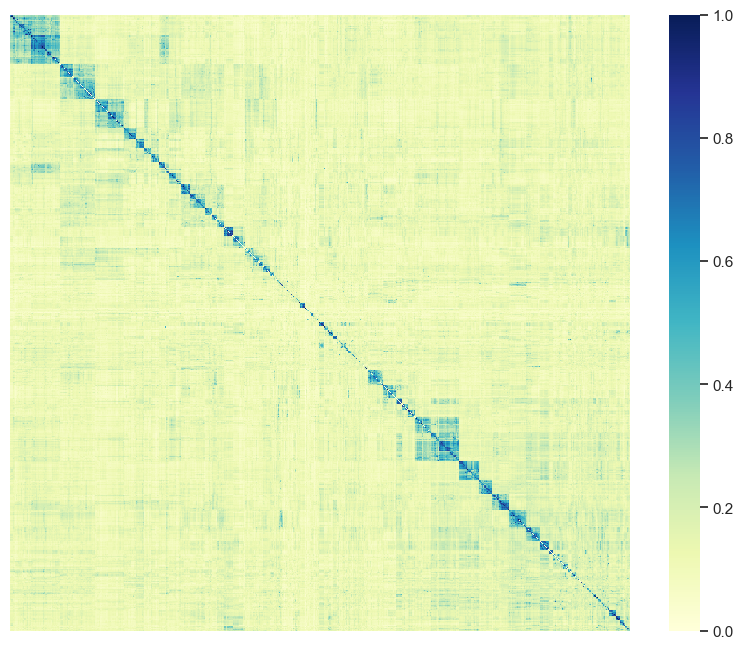

In [25]:
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy

# Load the dataset of molecules and generate fingerprints
mols = [Chem.MolFromSmiles(smiles) for smiles in X["canonical_smiles"]]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

# Calculate the pairwise Tanimoto similarity index between all pairs of molecules
similarity_matrix = np.zeros((len(mols), len(mols)))
for i in range(len(mols)):
    for j in range(i+1, len(mols)):
        similarity_matrix[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[j,i] = similarity_matrix[i,j]

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(similarity_matrix, method='ward')

# Reorder the rows and columns of the similarity matrix based on the dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, no_plot=True)
row_order = dendrogram['leaves']
col_order = dendrogram['leaves']
similarity_matrix_sorted = similarity_matrix[row_order][:, col_order]

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix_sorted, index=range(len(mols)), columns=range(len(mols)))

# Plot the heatmap
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(similarity_df, cmap="YlGnBu", xticklabels=False, yticklabels=False)


The heatmap shows the pairwise similarities between the molecules in your dataset. Each row and column in the heatmap represents a molecule, and the color of each square represents the similarity between the two molecules corresponding to that row and column.

The brighter (more yellow/green) a square is, the more similar the two molecules are, while the darker (more blue) a square is, the less similar they are. The diagonal line of the heatmap represents the self-similarity of each molecule, which is always 1 (since a molecule is always identical to itself).

By sorting the molecules based on their similarity, the heatmap shows clusters of molecules that are more similar to each other than to other molecules in the dataset. You can use the dendrogram on the left side of the heatmap to visualize the hierarchical clustering of the molecules. The dendrogram shows how the molecules are grouped into clusters based on their similarity.

Overall, the heatmap and dendrogram provide a useful visualization of the similarity relationships between the molecules in your dataset. This can be helpful for identifying groups of structurally similar molecules, as well as for identifying outliers or unique molecules that are not similar to others in the dataset.

In [27]:
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614
0,0.000000,1.000000,0.792453,0.590164,0.571429,0.539683,0.701754,0.701754,0.701754,0.701754,...,0.109890,0.100000,0.101124,0.108696,0.109890,0.122449,0.095238,0.112245,0.102564,0.113636
1,1.000000,0.000000,0.792453,0.590164,0.571429,0.539683,0.701754,0.701754,0.701754,0.701754,...,0.109890,0.100000,0.101124,0.108696,0.109890,0.122449,0.095238,0.112245,0.102564,0.113636
2,0.792453,0.792453,0.000000,0.627119,0.580645,0.548387,0.714286,0.714286,0.714286,0.714286,...,0.098901,0.088889,0.089888,0.097826,0.098901,0.112245,0.083333,0.102041,0.089744,0.102273
3,0.590164,0.590164,0.627119,0.000000,0.785714,0.719298,0.814815,0.814815,0.814815,0.814815,...,0.108696,0.098901,0.100000,0.107527,0.108696,0.132653,0.081395,0.089109,0.101266,0.112360
4,0.571429,0.571429,0.580645,0.785714,0.000000,0.694915,0.785714,0.785714,0.785714,0.785714,...,0.106383,0.096774,0.097826,0.105263,0.106383,0.130000,0.079545,0.087379,0.098765,0.122222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,0.122449,0.122449,0.112245,0.132653,0.130000,0.144330,0.132653,0.132653,0.132653,0.132653,...,0.455696,0.329412,0.333333,0.364706,0.369048,0.000000,0.558824,0.351648,0.315789,0.333333
2611,0.095238,0.095238,0.083333,0.081395,0.079545,0.094118,0.081395,0.081395,0.081395,0.081395,...,0.564516,0.417910,0.424242,0.441176,0.447761,0.558824,0.000000,0.438356,0.438596,0.446154
2612,0.112245,0.112245,0.102041,0.089109,0.087379,0.100000,0.089109,0.089109,0.089109,0.089109,...,0.295455,0.302326,0.305882,0.292135,0.295455,0.351648,0.438356,0.000000,0.337838,0.337349
2613,0.102564,0.102564,0.089744,0.101266,0.098765,0.101266,0.101266,0.101266,0.101266,0.101266,...,0.516667,0.508475,0.517241,0.508197,0.516667,0.315789,0.438596,0.337838,0.000000,0.517241


In [30]:
similarity_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614
count,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,...,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000
mean,0.136125,0.136125,0.132596,0.130205,0.128213,0.130369,0.136762,0.136762,0.136762,0.136762,...,0.169375,0.147807,0.147368,0.158035,0.157650,0.160822,0.159045,0.134324,0.139714,0.138133
std,0.070764,0.070764,0.071510,0.070541,0.068379,0.070215,0.073477,0.073477,0.073477,0.073477,...,0.066360,0.058443,0.060349,0.055565,0.056805,0.063900,0.071012,0.049701,0.056692,0.049951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.097561,0.097561,0.094118,0.096386,0.095745,0.096022,0.102041,0.102041,0.102041,0.102041,...,0.125000,0.110000,0.108565,0.119565,0.118421,0.114943,0.109589,0.098955,0.101358,0.102564
50%,0.123288,0.123288,0.118812,0.113924,0.112360,0.113924,0.121622,0.121622,0.121622,0.121622,...,0.157895,0.135802,0.132530,0.150000,0.148936,0.142857,0.141176,0.123894,0.126761,0.128205
75%,0.150000,0.150000,0.141026,0.133333,0.131724,0.134021,0.141176,0.141176,0.141176,0.141176,...,0.200000,0.172043,0.170732,0.185185,0.184624,0.190476,0.191489,0.157303,0.164557,0.162500
max,1.000000,1.000000,0.792453,0.814815,0.785714,0.719298,1.000000,1.000000,1.000000,1.000000,...,0.827586,0.803571,0.803571,0.813559,0.827586,0.558824,0.564516,0.438356,0.553191,0.521127


### Applicability Domain

In [72]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



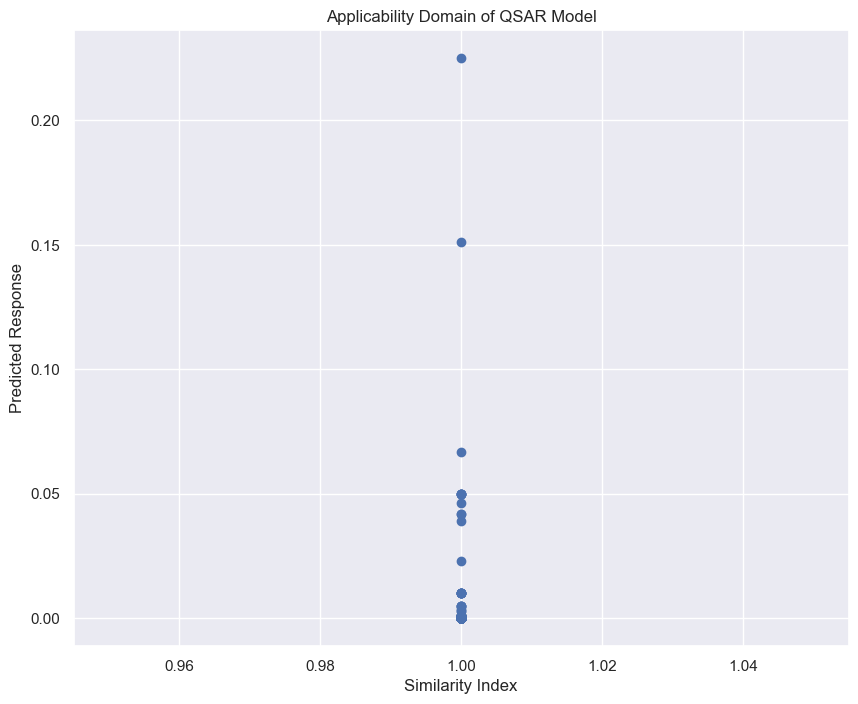

In [76]:
# Load the QSAR model and test set molecules
import joblib
from sklearn.metrics import jaccard_score
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = pd.read_csv('serotonin_clean_needed_dataset.csv')
# Load the dataset of molecules with associated activities
y = pd.read_csv('serotonin_ki_minmax_scale.csv')

# Load the dataset of molecules
mols = [Chem.MolFromSmiles(smiles) for smiles in X["canonical_smiles"]]

# Generate fingerprints for each molecule
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(fps, y, test_size=0.2)

# Train a random forest regression model on the training set
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Calculate the similarity index between each test set molecule and the molecules in the training set
similarity_index = []
for i in range(len(test_mols)):
    sim = []
    for j in range(len(train_mols)):
        sim.append(DataStructs.TanimotoSimilarity(fps[i], fps[j]))
    similarity_index.append(max(sim))

# Predict the response for each test set molecule using the QSAR model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# print(f'Mean squared error: {mse:.3f}')

# Plot the predicted response against the similarity index
plt.scatter(similarity_index, y_pred)
plt.xlabel('Similarity Index')
plt.ylabel('Predicted Response')
plt.title('Applicability Domain of QSAR Model')
plt.savefig('result3/graph/scatter_plot_applicability_domain.png', dpi=300)
plt.show()

In [75]:
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"r2score => {r2score} \nrmse => {rmse} \nmse {mse}" )


r2score => -0.20142795123654844 
rmse => 0.04003489104232798 
mse 0.0016027925007710728


The plot shows the relationship between the predicted response (y-axis) and the similarity index (x-axis) for the test set molecules. The similarity index is a measure of how similar each test set molecule is to the molecules in the training set.

A high similarity index means that the test set molecule is similar to many molecules in the training set, while a low similarity index means that the test set molecule is dissimilar to most of the molecules in the training set.

The plot can be used to evaluate the applicability domain of the QSAR model. Ideally, the model should perform well for molecules that are similar to those in the training set (i.e., have a high similarity index) and less well for molecules that are dissimilar to those in the training set (i.e., have a low similarity index). If the model performs poorly for molecules with a high similarity index, it may indicate that the model is overfitting or that the training set does not adequately represent the space of molecules of interest.

  



Regenerate response.